In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', None)

In [4]:
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df['gender'] = df['gender'].map({'Female' : 0 , 'Male' : 1})
df['Churn'] = df['Churn'].map({'No' : 0, 'Yes' : 1})

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.dropna(inplace=True)
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
for col in df.columns:
  if df[col].dtype !='object':
    print(col)


gender
SeniorCitizen
tenure
MonthlyCharges
TotalCharges
Churn


In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Selected features are ['tenure', 'TotalCharges', 'Contract', 'TechSupport', 'MonthlyCharges']


Text(0.5, 1.0, 'Important features')

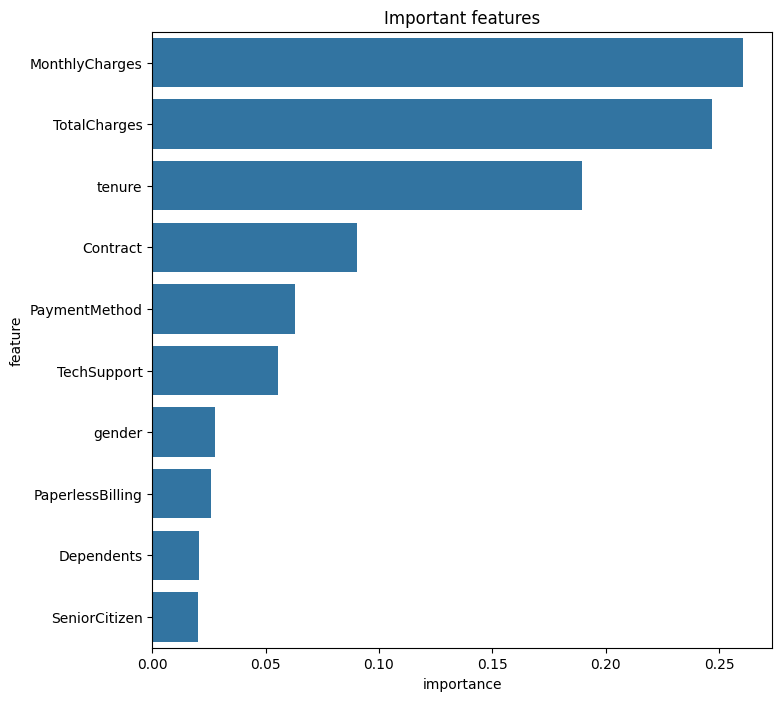

In [13]:
important_features = ['gender','Dependents','tenure','TotalCharges','Contract','PaymentMethod','TechSupport','MonthlyCharges', 'SeniorCitizen','PaperlessBilling']

for col in important_features:
  if df[col].dtype == 'object':
    df[col] = pd.factorize(df[col])[0]

X = df[important_features]
y = df['Churn']

rf = RandomForestClassifier(n_estimators= 120, random_state=32)

rfe= RFE(estimator= rf, n_features_to_select=5)

rfe.fit(X, y)

selected_features = []

for features, selected in zip(important_features, rfe.support_):
  if selected:
    selected_features.append(features)
print("Selected features are" ,selected_features)

rf.fit(X, y)
importance = pd.DataFrame({'feature':important_features, 'importance': rf.feature_importances_})

importance = importance.sort_values('importance', ascending = False)

plt.figure(figsize = (8,8))
sns.barplot(x = 'importance' , y = 'feature' , data = importance)
plt.title("Important features")




In [14]:
#### model building

X = df[selected_features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

scaler = StandardScaler()

X_trained_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

**Logistic Regresion**

In [15]:
param_grid =  {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [16]:
log_reg= LogisticRegression()

grid_srach= GridSearchCV(estimator= log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

grid_srach.fit(X_trained_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [17]:
grid_srach.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [18]:
up_log_reg = LogisticRegression(C = 10, penalty = 'l1' , solver = 'liblinear')
up_log_reg.fit(X_trained_sc, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [19]:
y_pred=up_log_reg.predict(X_test_sc)

In [20]:
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_accuracy

0.7853589196872779

**Decision Tree Classifier**

In [21]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 10, None],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state = 42)

grid_search = GridSearchCV(estimator= dt, param_grid = param_grid , cv = 5, scoring = 'accuracy')

grid_search.fit(X_trained_sc, y_train)

grid_search.best_params_


" param_grid = {\n    'criterion' : ['gini', 'entropy'],\n    'max_depth' : [3, 5, 10, None],\n    'min_samples_split' : [2, 5, 10],\n    'min_samples_leaf' : [1, 2, 4]\n}\n\ndt = DecisionTreeClassifier(random_state = 42)\n\ngrid_search = GridSearchCV(estimator= dt, param_grid = param_grid , cv = 5, scoring = 'accuracy')\n\ngrid_search.fit(X_trained_sc, y_train)\n\ngrid_search.best_params_ "

In [22]:
up_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_samples_leaf =4, min_samples_split = 2)
up_dt.fit(X_trained_sc, y_train)
dt_y_pred = up_dt.predict(X_test_sc)

In [23]:
dt_accuarcy_score= accuracy_score(y_test, dt_y_pred)
dt_accuarcy_score

0.7782515991471215

**Random Forest Classifier**

In [24]:
param_grid={
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rfe = RandomForestClassifier(random_state = 32)

grid_search = GridSearchCV(estimator= rfe, param_grid = param_grid ,cv = 5, scoring = 'accuracy')

grid_search.fit(X_trained_sc, y_train)

grid_search.best_params_


"param_grid={\n    'n_estimators': [100,200,300],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\n\nrfe = RandomForestClassifier(random_state = 32)\n\ngrid_search = GridSearchCV(estimator= rfe, param_grid = param_grid ,cv = 5, scoring = 'accuracy')\n\ngrid_search.fit(X_trained_sc, y_train)\n\ngrid_search.best_params_"

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [25]:
up_rfc = RandomForestClassifier(bootstrap = True,
 max_depth = 10,
 min_samples_leaf = 4,
 min_samples_split = 10,
 n_estimators = 100)

up_rfc.fit(X_trained_sc, y_train)

rfc_y_pred = up_rfc.predict(X_test_sc)

rfc_accuracy_score = accuracy_score(y_test,rfc_y_pred)

rfc_accuracy_score

0.8052594171997157

In [43]:
probs = up_rfc.predict_proba(X_test_sc)[:,1]
probs

array([0.51910697, 0.00155734, 0.85605148, ..., 0.20739729, 0.00155734,
       0.1089518 ])

**Gradient Boosting**

In [26]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'subsample': [0.8, 1.0]
}
gbc = GradientBoostingClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_trained_sc, y_train)

grid_search.best_params_






"param_grid = {\n    'n_estimators': [100, 200],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'max_depth': [3, 5, 7],\n    'min_samples_split': [2, 5],\n    'min_samples_leaf': [1, 3],\n    'subsample': [0.8, 1.0]\n}\ngbc = GradientBoostingClassifier(random_state = 42)\n\ngrid_search = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 5, scoring = 'accuracy')\n\ngrid_search.fit(X_trained_sc, y_train)\n\ngrid_search.best_params_ "

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100,
 'subsample': 1.0}

In [27]:
up_gbc = GradientBoostingClassifier( learning_rate = 0.1,
 max_depth = 3,
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 100,
 subsample = 1.0)

up_gbc.fit(X_trained_sc, y_train)

gbc_y_pred=up_gbc.predict(X_test_sc)

gbc_accuracy_score = accuracy_score(y_test,gbc_y_pred )
gbc_accuracy_score

0.7867803837953091

**XGBoost Classifier**

In [28]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [1, 5],
    'reg_alpha': [0, 1]
}

xgb = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid , cv = 5, scoring = 'accuracy')

grid_search.fit(X_trained_sc, y_train)

grid_search.best_params_




"param_grid = {\n    'n_estimators': [100, 200],\n    'max_depth': [3, 5, 7],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'subsample': [0.8, 1.0],\n    'colsample_bytree': [0.8, 1.0],\n    'gamma': [0, 1, 5],\n    'reg_lambda': [1, 5],\n    'reg_alpha': [0, 1]\n}\n\nxgb = XGBClassifier(random_state=42)\n\ngrid_search = GridSearchCV(estimator = xgb, param_grid = param_grid , cv = 5, scoring = 'accuracy')\n\ngrid_search.fit(X_trained_sc, y_train)\n\ngrid_search.best_params_"

In [29]:
up_xgb = XGBClassifier(colsample_bytree =1.0,
 gamma = 5,
 learning_rate = 0.1,
 max_depth = 5,
 n_estimators = 100,
 reg_alpha = 0,
 reg_lambda = 5,
 subsample = 1.0)

up_xgb.fit(X_trained_sc, y_train)

xgb_y_pred = up_xgb.predict(X_test_sc)

Xgb_accuracy_score = accuracy_score(y_test,xgb_y_pred)
Xgb_accuracy_score


0.7953091684434968

**Support Vector Machine**

In [30]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svm = SVC(random_state = 42)

grid_search = GridSearchCV(estimator =svm, param_grid = param_grid, cv=5, scoring = 'accuracy')

grid_search.fit(X_trained_sc, y_train)

grid_search.best_params_



"param_grid = {\n    'C': [0.1, 1, 10, 100],\n    'kernel': ['linear', 'rbf', 'poly'],\n    'gamma': ['scale', 'auto'],\n    'degree': [2, 3, 4]\n}\n\nsvm = SVC(random_state = 42)\n\ngrid_search = GridSearchCV(estimator =svm, param_grid = param_grid, cv=5, scoring = 'accuracy')\n\ngrid_search.fit(X_trained_sc, y_train)\n\ngrid_search.best_params_"

'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'

In [31]:
up_svm = SVC(C = 100, degree = 2, gamma = 'scale', kernel = 'rbf')

up_svm.fit(X_trained_sc, y_train)

svm_y_pred = up_svm.predict(X_test_sc)

svm_accuracy_score = accuracy_score(y_test,xgb_y_pred)
svm_accuracy_score


0.7953091684434968

In [32]:
compare = pd.DataFrame({
    'Models' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM' ],
    'Accuracy_Scores': [log_reg_accuracy, dt_accuarcy_score, rfc_accuracy_score, gbc_accuracy_score, Xgb_accuracy_score, svm_accuracy_score ]

})

<ipython-input-34-4bb66c2aacc6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Accuracy_Scores", y="Models", data=compare, palette="Blues_d")


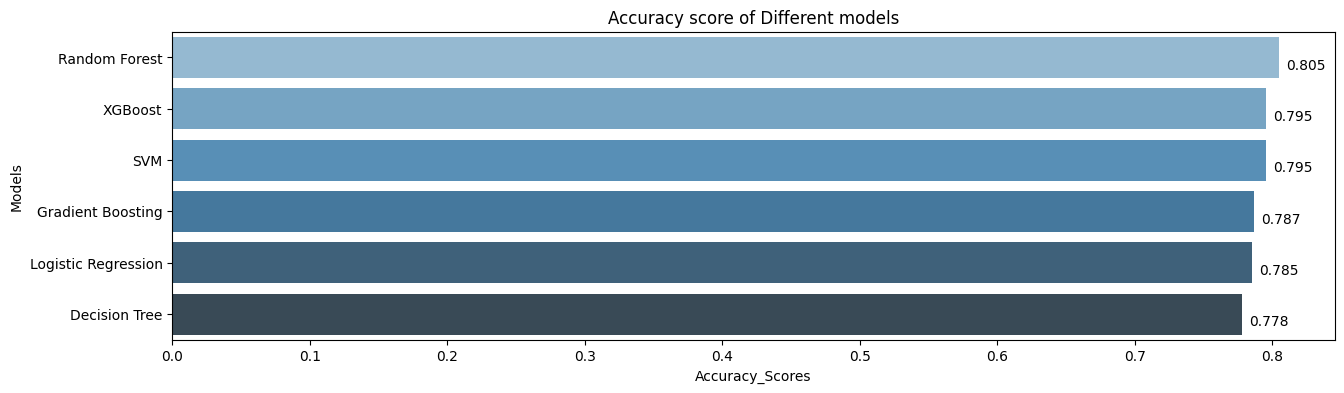

In [34]:
compare = compare.sort_values(by="Accuracy_Scores", ascending=False)

plt.figure(figsize=(15,4))
ax=sns.barplot(x="Accuracy_Scores", y="Models", data=compare, palette="Blues_d")
plt.title("Accuracy score of Different models")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [60]:
df_test_aligned = df.loc[X_test.index]

In [62]:
result = pd.DataFrame(
    {
        'Customer_id' : df_test_aligned['customerID'],
        'Churn_prediction' : rfc_y_pred,
        'Churn_probability' : probs
    }
)

In [63]:
result['Churn_label'] = result['Churn_prediction'].map({ 0 : 'No', 1 : 'Yes'})

In [64]:
result

,Customer_id,Churn_prediction,Churn_probability,Churn_label
4777,7501-VTYLJ,1,0.519107,Yes
2920,9453-PATOS,0,0.001557,No
3969,2920-RNCEZ,1,0.856051,Yes
3414,4837-PZTIC,0,0.031343,No
6528,4957-SREEC,0,0.000314,No
...,...,...,...,...
1672,4737-AQCPU,0,0.006558,No
3567,1670-SVOWZ,1,0.573079,Yes
5779,2237-ZFSMY,0,0.207397,No
2058,0744-BIKKF,0,0.001557,No
